In [105]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [109]:
import imblearn.ensemble

In [149]:
#from umap import UMAP
#import hdbscan
#from hdbscan import HDBSCAN
import pickle

from pymethylprocess.MethylationDataTypes import MethylationArray
from pymethylprocess.general_machine_learning import MachineLearning
import pandas as pd, numpy as np
from sklearn.decomposition import PCA
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
import pandas as pd
from sklearn.preprocessing import LabelEncoder,label_binarize
sns.set()
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix



## Load Data

In [15]:
train_methyl_array=MethylationArray.from_pickle("/mnt/c/Users/bless/OneDrive/MS_Studies/AML/GSE112047/train_val_test_sets/train_methyl_array.pkl")
val_methyl_array=MethylationArray.from_pickle("/mnt/c/Users/bless/OneDrive/MS_Studies/AML/GSE112047/train_val_test_sets/val_methyl_array.pkl")
test_methyl_array=MethylationArray.from_pickle("/mnt/c/Users/bless/OneDrive/MS_Studies/AML/GSE112047/train_val_test_sets/test_methyl_array.pkl")

In [16]:
print(train_methyl_array.pheno['disease'])

GSM3053794_200123460049_R01C02    Adjacent normal prostate tissue
GSM3053800_200123460049_R04C02    Adjacent normal prostate tissue
GSM3053773_200121140086_R03C01    Adjacent normal prostate tissue
GSM3053798_200123460049_R03C02                     prostate tumor
GSM3053796_200123460049_R02C02                     prostate tumor
GSM3053775_200121140086_R04C01                     prostate tumor
GSM3053813_200123460050_R05C02                     prostate tumor
GSM3053801_200123460049_R05C01    Adjacent normal prostate tissue
GSM3053772_200121140086_R02C02                     prostate tumor
GSM3053809_200123460050_R03C01    Adjacent normal prostate tissue
GSM3053782_200123460034_R01C02    Adjacent normal prostate tissue
GSM3053808_200123460050_R02C02                     prostate tumor
GSM3053793_200123460049_R01C01    Adjacent normal prostate tissue
GSM3053805_200123460050_R01C01    Adjacent normal prostate tissue
GSM3053795_200123460049_R02C01                     prostate tumor
GSM3053786

In [17]:
print(test_methyl_array.pheno['disease'])

GSM3053770_200121140086_R01C02                     prostate tumor
GSM3053771_200121140086_R02C01                     prostate tumor
GSM3053776_200121140086_R04C02                     prostate tumor
GSM3053779_200121140086_R06C01                     prostate tumor
GSM3053780_200121140086_R06C02                     prostate tumor
GSM3053783_200123460034_R02C01                     prostate tumor
GSM3053787_200123460034_R04C01                     prostate tumor
GSM3053789_200123460034_R05C01    Adjacent normal prostate tissue
GSM3053790_200123460034_R05C02                     prostate tumor
GSM3053791_200123460034_R06C01                     prostate tumor
GSM3053792_200123460034_R06C02                     prostate tumor
GSM3053797_200123460049_R03C01    Adjacent normal prostate tissue
GSM3053803_200123460049_R06C01                     prostate tumor
GSM3053804_200123460049_R06C02                     prostate tumor
GSM3053806_200123460050_R01C02                     prostate tumor
GSM3053807

In [19]:
print(val_methyl_array.pheno['disease'])

GSM3053781_200123460034_R01C01    Adjacent normal prostate tissue
GSM3053788_200123460034_R04C02                     prostate tumor
GSM3053777_200121140086_R05C01    Adjacent normal prostate tissue
GSM3053802_200123460049_R05C02                     prostate tumor
GSM3053778_200121140086_R05C02                     prostate tumor
GSM3053785_200123460034_R03C01    Adjacent normal prostate tissue
Name: disease, dtype: object


## Cluster Training Data

## Supervised Model

In [21]:
#print(train_methyl_array.pheno['disease'])
encoder = LabelEncoder()
train_methyl_array.pheno['disease'] = encoder.fit_transform(train_methyl_array.pheno['disease'])
val_methyl_array.pheno['disease'] = encoder.fit_transform(val_methyl_array.pheno['disease'])
test_methyl_array.pheno['disease'] = encoder.fit_transform(test_methyl_array.pheno['disease'])

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

y_pred = {}
scores={}
model=MachineLearning(RandomForestRegressor,options={})
model.fit(train_methyl_array,val_methyl_array,'disease')
y_pred['train']=model.predict(train_methyl_array)
y_pred['val']=model.predict(val_methyl_array)
y_pred['test']=model.predict(test_methyl_array)

In [23]:
y_pred['train'] = np.floor(y_pred['train'] + 0.5).astype(int)
y_pred['val'] = np.floor(y_pred['val'] + 0.5).astype(int)
y_pred['test'] = np.floor(y_pred['test'] + 0.5).astype(int)

scores['train']=r2_score(train_methyl_array.pheno['disease'],y_pred['train'])
scores['val']=r2_score(val_methyl_array.pheno['disease'],y_pred['val'])
scores['test']=r2_score(test_methyl_array.pheno['disease'],y_pred['test'])
scores

{'train': 1.0, 'val': 1.0, 'test': 1.0}

In [24]:
train_methyl_array.pheno['disease']

GSM3053794_200123460049_R01C02    0
GSM3053800_200123460049_R04C02    0
GSM3053773_200121140086_R03C01    0
GSM3053798_200123460049_R03C02    1
GSM3053796_200123460049_R02C02    1
GSM3053775_200121140086_R04C01    1
GSM3053813_200123460050_R05C02    1
GSM3053801_200123460049_R05C01    0
GSM3053772_200121140086_R02C02    1
GSM3053809_200123460050_R03C01    0
GSM3053782_200123460034_R01C02    0
GSM3053808_200123460050_R02C02    1
GSM3053793_200123460049_R01C01    0
GSM3053805_200123460050_R01C01    0
GSM3053795_200123460049_R02C01    1
GSM3053786_200123460034_R03C02    1
GSM3053814_200123460050_R06C01    1
GSM3053812_200123460050_R05C01    0
GSM3053799_200123460049_R04C01    1
GSM3053769_200121140086_R01C01    0
GSM3053784_200123460034_R02C02    1
GSM3053774_200121140086_R03C02    0
Name: disease, dtype: int64

In [25]:
data=pd.DataFrame(model.model.feature_importances_,columns=['Importance'])
data=data.sort_values('Importance').iloc[::-1]
data['sample']=np.arange(len(data.index))

#plt.figure(figsize=(5,5))
#sns.barplot('sample','Importance',data=data)
#plt.axis('off')

In [26]:
data

,Importance,sample
74399,0.01,0
18671,0.01,1
15055,0.01,2
11381,0.01,3
1336,0.01,4
...,...,...
199998,0.00,299995
199999,0.00,299996
200000,0.00,299997
200001,0.00,299998


In [ ]:
data

In [78]:
#methyl="C:\Users\bless\OneDrive\MS_Studies\AML\GSE189778\methyl_array.pkl"
df = pd.read_pickle('/mnt/c/Users/bless/OneDrive/MS_Studies/AML/GSE112047/methyl_array.pkl')

train=train_methyl_array.beta
test=test_methyl_array.beta
val=val_methyl_array.beta

In [90]:
df['beta']

,cg14112997,cg27083089,cg17348244,cg01105403,cg13573375,cg17174466,cg16112880,cg19311470,cg05455372,cg10890644,...,cg03303006,cg00830325,cg06794209,cg18755404,cg03348573,cg27075324,cg03801924,cg23845310,cg17336044,cg24931017
GSM3053769_200121140086_R01C01,0.156627,0.845740,0.877346,0.874792,0.875365,0.877621,0.604000,0.636789,0.069515,0.779763,...,0.834413,0.863576,0.819019,0.889523,0.072761,0.065230,0.854677,0.878845,0.907350,0.926854
GSM3053770_200121140086_R01C02,0.801321,0.698001,0.433365,0.873554,0.714947,0.920206,0.752649,0.512741,0.879821,0.783932,...,0.863729,0.890209,0.893158,0.865353,0.066718,0.091046,0.878981,0.888259,0.900416,0.917176
GSM3053771_200121140086_R02C01,0.088370,0.827146,0.859126,0.859554,0.888944,0.891344,0.618964,0.712502,0.045973,0.792580,...,0.862926,0.835308,0.886809,0.864712,0.026658,0.087189,0.873260,0.865479,0.891678,0.896054
GSM3053772_200121140086_R02C02,0.119766,0.408835,0.867944,0.865788,0.866241,0.919639,0.896440,0.834830,0.078835,0.716996,...,0.881123,0.859896,0.897104,0.851320,0.036082,0.096840,0.852810,0.875075,0.904758,0.927726
GSM3053773_200121140086_R03C01,0.843144,0.176935,0.862777,0.179805,0.137978,0.185692,0.580617,0.636916,0.620738,0.130980,...,0.888156,0.885679,0.868154,0.870952,0.049919,0.062496,0.870132,0.876233,0.894603,0.911682
GSM3053774_200121140086_R03C02,0.792106,0.222467,0.159829,0.827178,0.453553,0.891807,0.138498,0.162793,0.581768,0.147180,...,0.878786,0.885048,0.909542,0.853154,0.063125,0.057572,0.852730,0.881102,0.895995,0.914890
GSM3053775_200121140086_R04C01,0.722325,0.626311,0.858128,0.205811,0.166366,0.176342,0.578114,0.643690,0.575705,0.085097,...,0.879744,0.911533,0.882863,0.866958,0.048705,0.051889,0.881682,0.890995,0.890163,0.931599
GSM3053776_200121140086_R04C02,0.802435,0.308316,0.160885,0.876174,0.214214,0.884207,0.100774,0.063447,0.481251,0.133434,...,0.868301,0.870031,0.904845,0.849022,0.099946,0.059742,0.810925,0.868072,0.882860,0.931297
GSM3053777_200121140086_R05C01,0.747015,0.503413,0.195108,0.846072,0.365750,0.234579,0.086912,0.655089,0.623257,0.748915,...,0.875758,0.882611,0.885495,0.876178,0.056174,0.056377,0.887709,0.885880,0.895799,0.909309
GSM3053778_200121140086_R05C02,0.836274,0.010724,0.168285,0.872351,0.225049,0.860547,0.895509,0.639031,0.061229,0.779654,...,0.876961,0.884387,0.908031,0.848304,0.044333,0.064044,0.893385,0.886111,0.904534,0.898385


In [91]:
df['pheno']

,X,Basename,AccNum,disease,Sex
GSM3053769_200121140086_R01C01,0,geo_idats/GSM3053769_200121140086_R01C01,GSM3053769,Adjacent normal prostate tissue,-2147483648
GSM3053770_200121140086_R01C02,1,geo_idats/GSM3053770_200121140086_R01C02,GSM3053770,prostate tumor,-2147483648
GSM3053771_200121140086_R02C01,2,geo_idats/GSM3053771_200121140086_R02C01,GSM3053771,prostate tumor,-2147483648
GSM3053772_200121140086_R02C02,3,geo_idats/GSM3053772_200121140086_R02C02,GSM3053772,prostate tumor,-2147483648
GSM3053773_200121140086_R03C01,4,geo_idats/GSM3053773_200121140086_R03C01,GSM3053773,Adjacent normal prostate tissue,-2147483648
GSM3053774_200121140086_R03C02,5,geo_idats/GSM3053774_200121140086_R03C02,GSM3053774,Adjacent normal prostate tissue,-2147483648
GSM3053775_200121140086_R04C01,6,geo_idats/GSM3053775_200121140086_R04C01,GSM3053775,prostate tumor,-2147483648
GSM3053776_200121140086_R04C02,7,geo_idats/GSM3053776_200121140086_R04C02,GSM3053776,prostate tumor,-2147483648
GSM3053777_200121140086_R05C01,8,geo_idats/GSM3053777_200121140086_R05C01,GSM3053777,Adjacent normal prostate tissue,-2147483648
GSM3053778_200121140086_R05C02,9,geo_idats/GSM3053778_200121140086_R05C02,GSM3053778,prostate tumor,-2147483648


In [92]:
merged_df = pd.concat([df['beta'], df['pheno'].iloc[:,3]], axis=1)

In [93]:
merged_df

,cg14112997,cg27083089,cg17348244,cg01105403,cg13573375,cg17174466,cg16112880,cg19311470,cg05455372,cg10890644,...,cg00830325,cg06794209,cg18755404,cg03348573,cg27075324,cg03801924,cg23845310,cg17336044,cg24931017,disease
GSM3053769_200121140086_R01C01,0.156627,0.845740,0.877346,0.874792,0.875365,0.877621,0.604000,0.636789,0.069515,0.779763,...,0.863576,0.819019,0.889523,0.072761,0.065230,0.854677,0.878845,0.907350,0.926854,Adjacent normal prostate tissue
GSM3053770_200121140086_R01C02,0.801321,0.698001,0.433365,0.873554,0.714947,0.920206,0.752649,0.512741,0.879821,0.783932,...,0.890209,0.893158,0.865353,0.066718,0.091046,0.878981,0.888259,0.900416,0.917176,prostate tumor
GSM3053771_200121140086_R02C01,0.088370,0.827146,0.859126,0.859554,0.888944,0.891344,0.618964,0.712502,0.045973,0.792580,...,0.835308,0.886809,0.864712,0.026658,0.087189,0.873260,0.865479,0.891678,0.896054,prostate tumor
GSM3053772_200121140086_R02C02,0.119766,0.408835,0.867944,0.865788,0.866241,0.919639,0.896440,0.834830,0.078835,0.716996,...,0.859896,0.897104,0.851320,0.036082,0.096840,0.852810,0.875075,0.904758,0.927726,prostate tumor
GSM3053773_200121140086_R03C01,0.843144,0.176935,0.862777,0.179805,0.137978,0.185692,0.580617,0.636916,0.620738,0.130980,...,0.885679,0.868154,0.870952,0.049919,0.062496,0.870132,0.876233,0.894603,0.911682,Adjacent normal prostate tissue
GSM3053774_200121140086_R03C02,0.792106,0.222467,0.159829,0.827178,0.453553,0.891807,0.138498,0.162793,0.581768,0.147180,...,0.885048,0.909542,0.853154,0.063125,0.057572,0.852730,0.881102,0.895995,0.914890,Adjacent normal prostate tissue
GSM3053775_200121140086_R04C01,0.722325,0.626311,0.858128,0.205811,0.166366,0.176342,0.578114,0.643690,0.575705,0.085097,...,0.911533,0.882863,0.866958,0.048705,0.051889,0.881682,0.890995,0.890163,0.931599,prostate tumor
GSM3053776_200121140086_R04C02,0.802435,0.308316,0.160885,0.876174,0.214214,0.884207,0.100774,0.063447,0.481251,0.133434,...,0.870031,0.904845,0.849022,0.099946,0.059742,0.810925,0.868072,0.882860,0.931297,prostate tumor
GSM3053777_200121140086_R05C01,0.747015,0.503413,0.195108,0.846072,0.365750,0.234579,0.086912,0.655089,0.623257,0.748915,...,0.882611,0.885495,0.876178,0.056174,0.056377,0.887709,0.885880,0.895799,0.909309,Adjacent normal prostate tissue
GSM3053778_200121140086_R05C02,0.836274,0.010724,0.168285,0.872351,0.225049,0.860547,0.895509,0.639031,0.061229,0.779654,...,0.884387,0.908031,0.848304,0.044333,0.064044,0.893385,0.886111,0.904534,0.898385,prostate tumor


In [94]:
X=merged_df.iloc[:,data.head(5000).index]

In [97]:
Y=merged_df["disease"]
Y.value_counts()

prostate tumor                     31
Adjacent normal prostate tissue    16
Name: disease, dtype: int64

In [87]:
Y=LabelEncoder().fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,stratify=Y,random_state=0)


In [114]:
smote=SMOTE(k_neighbors=3)
#adasyn = ADASYN(random_state=20)
X_tr,Y_tr =smote.fit_resample(X_train,Y_train)

In [122]:
#Application of the Machine Learning
estimators_list=[100,400,550]
for est in estimators_list:
    gb_classifier=GradientBoostingClassifier(n_estimators=est, max_features=8, random_state=1)
    gb_classifier.fit(X_tr,Y_tr )
    probs = gb_classifier.predict_proba(X_test)

    # Extract the probabilities of the positive class
    positive_class_probs = probs[:, 1]
    #print(probs.shape)

    # Calculate the AUC score
    auc_score = roc_auc_score(Y_test, positive_class_probs,multi_class='ovr')

    print('Number of estimators: ', est)
    print('AUC score: ', auc_score)
    print('---------------------------------------------------------')

Number of estimators:  100
AUC score:  1.0
---------------------------------------------------------
Number of estimators:  400
AUC score:  1.0
---------------------------------------------------------
Number of estimators:  550
AUC score:  1.0
---------------------------------------------------------


In [118]:
Y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [126]:
#Using the determined number of estimator
estimator=GradientBoostingClassifier(n_estimators=500, max_features=8,random_state=1)
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [132]:
probabilities=cross_val_predict(estimator,X_tr,Y_tr,cv=kfold,method='predict_proba')

In [178]:
# Y_pred = [0 if p[0] > 0.5 else 1 for p in probabilities]
# #Yr=Yr.tolist()
# print(len(Y_pred))
# print(len(Yr))
#The indexes of the maximum probability score in each row, that is which subtype has the max score
max_pr_y_tr=np.argmax(probabilities,axis=1)
#max_in
max_pr_y_tr

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [179]:
conf_mat = confusion_matrix(Y_tr,max_pr_y_tr) #true_labels, predicted_labels
conf_mat

array([[20,  0],
       [ 0, 20]])

In [180]:
accu_train=accuracy_score(Y_tr,max_pr_y_tr)
accu_train

1.0

In [181]:
grad=estimator.fit(X_tr,Y_tr)
test_pro=grad.predict_proba(X_test)

In [182]:
max_pr_y_test=np.argmax(test_pro,axis=1)
max_pr_y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [183]:
conf_mat = confusion_matrix(Y_test,max_pr_y_test) #true_labels, predicted_labels
print(conf_mat)

[[5 0]
 [2 9]]


In [184]:
Y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [185]:
max_pr_y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [186]:
accu_test=accuracy_score(Y_test,max_pr_y_test)
accu_test

0.875

In [187]:
# train=probabilities
# y_true = label_binarize(Y_tr, classes=np.unique(Y_tr))
# ytrain_pred=max_pr_y


1.0
0.9090909090909092


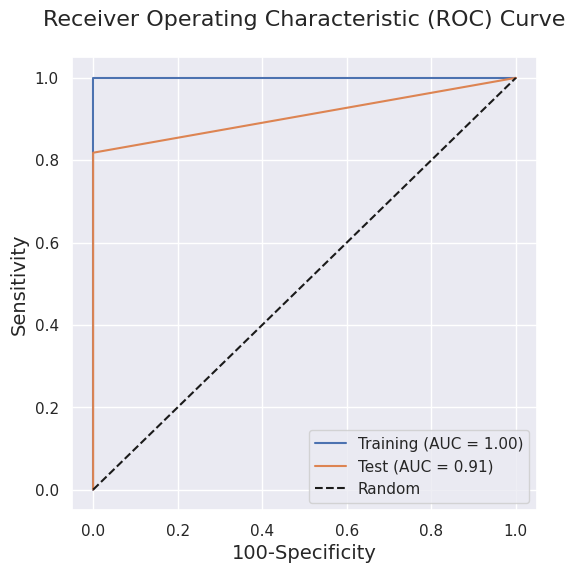

In [188]:
Train_prob=max_pr_y_tr

fpr_train,tpr_train,threshold_train=roc_curve(Y_tr,Train_prob)
auc_score = auc(fpr_train, tpr_train)
print(auc_score)

Test_prob=max_pr_y_test
fpr_test,tpr_test,threshold_test=roc_curve(Y_test,Test_prob)
auc_scorer = auc(fpr_test,tpr_test)
print(auc_scorer)

fig, ax = plt.subplots(figsize=(6,6),dpi=100)
plt.plot(fpr_train, tpr_train, label='Training (AUC = %0.2f)' % auc_score)
plt.plot(fpr_test,tpr_test, label='Test (AUC = %0.2f)' % auc_scorer)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('100-Specificity', fontsize=14)
plt.ylabel('Sensitivity', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve\n', fontsize=16)
plt.legend(loc='lower right')
plt.show()
#y['Gene'] = pd.to_numeric(y['Gene'], errors='coerce')
#y=y['Gene'].values.flatten()
#second_column = y.il.voc[:, 1]

#y.stack().reset_index(drop=True)
#y.values

#yy=yy.ravel()

In [193]:
grad.feature_importances_

array([7.92431751e-11, 0.00000000e+00, 9.64937656e-12, ...,
       0.00000000e+00, 0.00000000e+00, 5.68197973e-19])

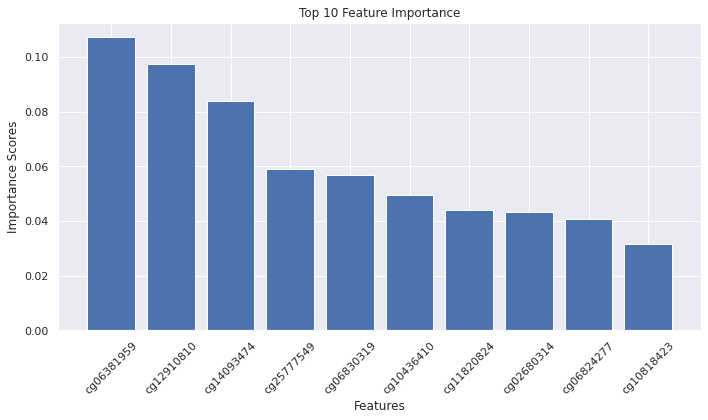

In [207]:
import matplotlib.pyplot as plt

importance_scores = grad.feature_importances_

# Sort the features by their importance scores
sorted_indices = importance_scores.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

# Select the top 10 features and their importance scores
top_features = sorted_features[:10]
top_scores = importance_scores[sorted_indices][:10]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_scores)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
